In [1]:
import numpy as np
import scipy as sp
import scipy.linalg as la 
import scipy.sparse.linalg as spla
import time 
import matplotlib.pyplot as plt
import cmath
import seaborn as sn
sn.set()
%matplotlib inline

### Problem 1.
Write a function `truncated_svd` that accepts a matrix `A` and an optional integer `k = None`. If `k` is `None`, calculate the compact SVD. If k is an integer, calculate the truncated SVD, keeping only the k largest singular values. (Note: if there are fewer than k nonzero singular values, the truncated SVD will come out the same as the compact SVD.) Since the only difference between these two processes is the number of singular values we keep, we only need to write one function.
Here’s an outline to follow:


1. Find the eigenvalues and eigenvectors of $A^HA$.
2. Find the singular values of `A`. Keep only the greatest `k`, and discard any that are equal to zero.
3. Calculate `V`.
4. Calculate `U`.

Return `U`, the diagonal of $\Sigma$, and `V`. Check your function by calculating the compact SVD and seeing if $U\Sigma V^H = A$ using `np.allclose()`.

Hint: When calculating the SVD, you will need to sort the eigenvalues while keeping track of their associated eigenvectors. Consider using the function `np.argsort()` for keeping the eigenvalues and eigenvectors in the same order while sorting.

In [2]:
A = np.random.random((10,10))

In [3]:
def truncated_svd(A, k=None, tol=1e-8):
    eigvals, eigvecs = la.eigh(np.dot(A.conjugate().T, A))
    sort_index = np.argsort(eigvals[eigvals>tol])[::-1]
    eigvals, eigvecs = eigvals[eigvals>tol][sort_index], eigvecs[eigvals>tol][sort_index]

    if not k:
        sing_val = np.sqrt(eigvals)
        V = eigvecs
    elif isinstance(k, int):
        sing_val = np.sqrt(eigvals[:k])
        V = eigvecs[:,:k]

    U = np.dot(A, (1/sing_val)*V.T)
    
    return U, sing_val, V

In [4]:
U,sigma,V = truncated_svd(A)

In [5]:
A_ = np.dot(np.dot(U, np.diag(sigma)), V)

In [6]:
#check
np.allclose(A, A_)

True

### Problem 2. 
In this problem we will use the SVD to visualize how the matrix

$$A = \begin{bmatrix}
3 & 1\\
1 & 3\\
\end{bmatrix}$$

acts on points in $R^2$. Given a set of points $S$ in $R^2$, we can calculate the transformation $AS$ in steps by using the SVD $A = U \Sigma V^H$.


Specifically, let $S$ be a set of points on the unit circle. To generate the x- and y-coordinates of $S$, recall the equation for the unit circle in polar coordinates:


$$x = cos(\theta)$$ $$y = sin(\theta)$$,
where $\theta$  $\epsilon$  $[0, 2\pi]$.


Plot four separate subplots to demonstrate each step of the transformation, plotting $S$, $V^HS$, $\Sigma V^HS$, then $U \Sigma V^H S$. Do the same for the standard basis vectors $e_1 = [1, 0]^T$ and $e_2 = [0, 1]^T$. Your solution should look similar to Figure 6.1.

(Hint: Force the plot to use the same scale on each of the axes with `plt.axis("equal")`. Otherwise, the circle will appear elliptical.)

In [7]:
theta = np.linspace(0, 2*np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)
S = np.vstack((x,y))
A = np.array([[3,1],
              [1,3]])

unitvecs1 = np.array([[0,1],
                      [0,0]])
unitvecs2 = np.array([[0,0],
                      [0,1]])
unitvecs = np.concatenate((unitvecs1, unitvecs2), axis=1)

In [8]:
U, sigma, V_H = truncated_svd(A)
vhs = np.dot(V_H, S)
sigvhs = np.dot(np.dot(np.diag(sigma), V_H), S)
usigvhs = np.dot(np.dot(np.dot(U, np.diag(sigma)), V_H), S)

#for the unit vectors

vhs_units = np.dot(V_H, unitvecs)
sigvhs_units = np.dot(np.dot(np.diag(sigma), V_H), unitvecs)
usigvhs_units = np.dot(np.dot(np.dot(U, np.diag(sigma)), V_H), unitvecs)

In [9]:
vhs_units

array([[ 0.        ,  0.70710678,  0.        ,  0.70710678],
       [ 0.        , -0.70710678,  0.        ,  0.70710678]])

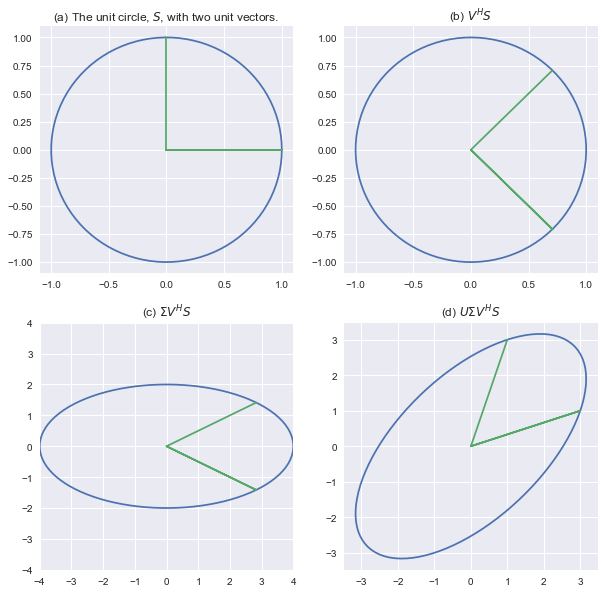

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax = ax.flatten()
ax[0].plot(S[0], S[1])
ax[0].plot(unitvecs[0], unitvecs[1])
ax[0].set_title("(a) The unit circle, $S$, with two unit vectors.")

ax[1].plot(vhs[0], vhs[1])
ax[1].plot(vhs_units[0], vhs_units[1])
ax[1].set_title("(b) $V^HS$")

ax[2].plot(sigvhs[0], sigvhs[1])
ax[2].plot(sigvhs_units[0], sigvhs_units[1])
ax[2].set_xlim((-4,4))
ax[2].set_ylim((-4,4))
ax[2].set_title("(c) $\Sigma V^HS$")

ax[3].plot(usigvhs[0], usigvhs[1])
ax[3].plot(usigvhs_units[0], usigvhs_units[1])
ax[3].set_title("(d) $U \Sigma V^HS$")

### Problem 3

Write a function `svd_approx` that takes as input a matrix `A` and a positive integer `k` and returns the best rank `k` approximation to `A` (with respect to the induced 2-norm and Frobenius norm). Use `scipy.linalg.svd`.


In [11]:
def svd_approx(A, k):
    U, sig, Vh = la.svd(A, full_matrices=False)
    A_hat = np.dot(np.dot(U[:,:k], np.diag(sig[:k])), Vh[:k,:])
    return A_hat

In [12]:
A = np.random.random((10,10))
A_hat = svd_approx(A, 5)

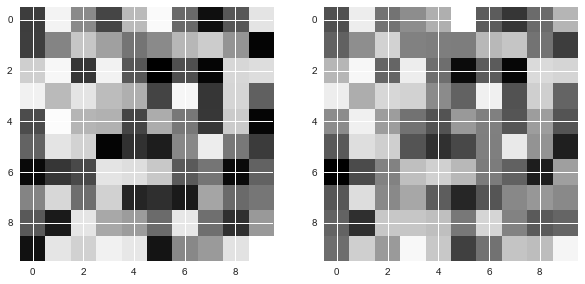

In [13]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5))
ax[0].imshow(A)
ax[1].imshow(A_hat)

In [14]:
A = plt.imread("../Data/Volume1/dream.png")
k = 20
A_hat = np.array([svd_approx(A[:,:,i], k) for i in range(3)]).transpose((1,2,0))

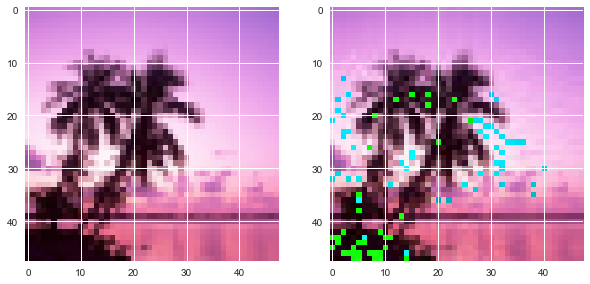

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5))
ax[0].imshow(A)
ax[1].imshow(A_hat)

### Problem 4. 
Using `scipy.linalg.svd`, write a function `lowest_rank_approx` that takes as input a matrix A and a positive number `e` and returns the lowest rank approximation of A with error less than `e` (with respect to the induced 2-norm). You should only calculate the SVD once.

In [16]:
def lowest_rank_approx(A, e):
    U, sig, Vh = la.svd(A, full_matrices=False)
    k = np.where(np.diff(sig>e))[0][0]+2
    A_hat = np.dot(np.dot(U[:,:k], np.diag(sig[:k])), Vh[:k,:])
    return A_hat

In [17]:
A = np.random.random((10,10))
e = 1
A_hat = lowest_rank_approx(A, e)

In [18]:
#check the error (should be less than e)
la.norm(A-A_hat)

1.2605058856543532

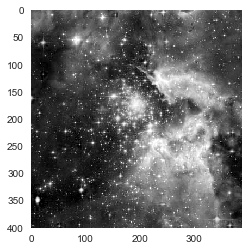

In [19]:
X = plt.imread('../Data/Volume1/hubble_image.jpg')[:,:,0].astype(float)
plt.imshow(X, cmap="gray")
plt.grid(False)

### Problem 5. 
Using the `svd_approx` function from Problem 3, write a function `compress_img` that accepts two parameters `filename` and `k`. The function should plot the original image and the best rank k approximation of the original image.


While `svd_approx` worked for grayscale images, the `compress_img` function should work on color images. You may split the image into its three RGB layers and approximate each layer separately, then recombine them. Test your function on hubble_image.jpg Your output should be similar to Figure 6.4.


Hints:

• Sometimes `plt.imshow` does not behave as expected when being passed RGB values between 0 and 255. It behaves much better when being passed values between 0 and 1.


• Since the SVD provides an approximation, it is possible that the SVD will generate values slightly outside the valid range of RGB values. To fix this, use fancy indexing (as discussed in the NumPy and SciPy lab) to set values greater than 1 to 1 and values less than 0 to 0.

In [20]:
def norm(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))
def compress_img(filename, k):
    A = plt.imread(filename)
    A_hat = np.array([norm(svd_approx(A[:,:,i], k)) for i in range(3)]).transpose((1,2,0))
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    ax[0].imshow(A)
    ax[0].grid(0)
    ax[0].set_title("Original Image", size = 20)
    ax[1].imshow(A_hat)
    ax[1].grid(0)
    ax[1].set_title("Rank %i Approximation"%(k), size = 20)

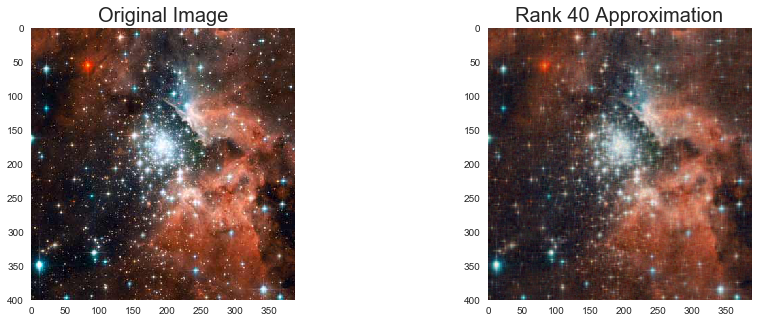

In [21]:
fname = "../Data/Volume1/hubble_image.jpg"
compress_img(fname, 40)